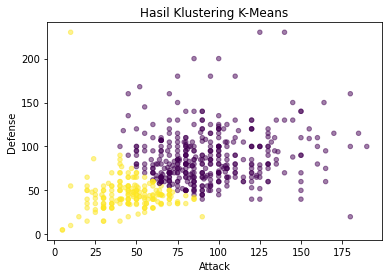

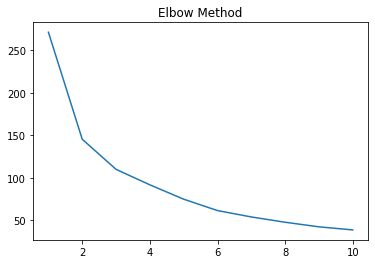

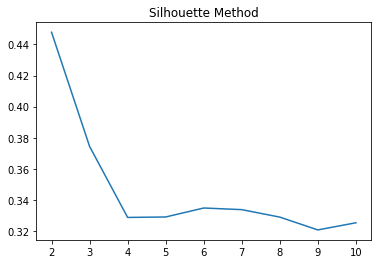

Nilai K terbaik adalah 2


In [ ]:
#amalia.ssafiera@gmail.com

import csv
from urllib.request import urlopen, Request
import requests
from bs4 import BeautifulSoup as bs 
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

class pokemon:
  def __init__(self):
    pass

  def scrapping(self):
   #pengambilan data dari situs web
    alamat = "https://pokemondb.net/pokedex/all"
    safeAdd = Request(alamat, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(safeAdd)
    data = bs(html, 'html.parser')
    table = data.find("table", {"id":"pokedex"})
    rows = data.findAll("tr")

    #mengambil sampai index ke-500
    row_data = []
    for row in rows:
        cell_data = []
        if row.contents[1].get_text() == "501": #stop function
            break

        for item in row.findAll(["th","td"]): #gathering function
            cell_data.append(item.get_text())
        row_data.append(cell_data)

    #memasukkan ke dataframe
    df = pd.DataFrame(row_data)
    df.columns = df.iloc[0]
    df = df[1:]

    #memasukan data ke dalam CSV
    df.to_csv('data_pokemon.csv',index=False)
  
  def kmeans(self):
    #membaca data CSV
    data = pd.read_csv("data_pokemon.csv") 

    #convert to numeric
    data["Attack"] = pd.to_numeric(data["Attack"])
    data["Defense"] = pd.to_numeric(data["Defense"])

    #menambahkan dua kolom tranformasi
    data["Alog"] = np.log(data["Attack"])
    data["Dlog"] = np.log(data["Defense"])

    #mengambil data pada dua kolom transformasi 
    log_data = data.iloc[:, 10:12]
    log_array = np.array(log_data)

    #klustering
    kmeans = KMeans(n_clusters=2, random_state=200)
    kmeans.fit(log_array)
    data['kluster'] = kmeans.labels_
    plt.scatter(data.Attack, data.Defense, s = 20, c = data.kluster, marker = "o", alpha = 0.5)
    plt.title("Hasil Klustering K-Means")
    plt.xlabel("Attack")
    plt.ylabel("Defense")
    plt.show()

    #memasukkan data kluster ke CSV
    data.to_csv('data_kluster.csv',index=False)

class evaluasi:
  def __init__(self):
    pass

  def elbow(self, X, value):
      sse = []
      k_list = []
      for k in range(1, 11):
          kmeans = KMeans(n_clusters = k).fit(X)
          centroids = kmeans.cluster_centers_
          prediksi = kmeans.predict(X)
          nilai_sse = 0
          
          for i in range(len(X)):
              titik_pusat = centroids[prediksi[i]]
              nilai_sse += (X[i, 0] - titik_pusat[0]) ** 2 + (X[i, 1] - titik_pusat[1]) ** 2
          
          sse.append(nilai_sse)
          k_list.append(k)

      plt.plot(k_list,sse)
      plt.title("Elbow Method")
      plt.show()

  def silhouette(self, X, value):
    data = []
    k_list = []

    for k in range(2, 11):
        kmeans = KMeans(n_clusters = k).fit(X)
        labels = kmeans.labels_
        data.append(silhouette_score(X, labels, metric = 'euclidean'))
        k_list.append(k)

    plt.plot(k_list,data)
    plt.title("Silhouette Method")
    plt.show()

live = pokemon()
live.scrapping()
live.kmeans()

live = evaluasi()
live.elbow(log_array,50)
live.silhouette(log_array,50)
print ('Nilai K terbaik adalah 2')
